In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway

In [11]:
df=pd.read_csv("../data/raw_data.csv")

In [12]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


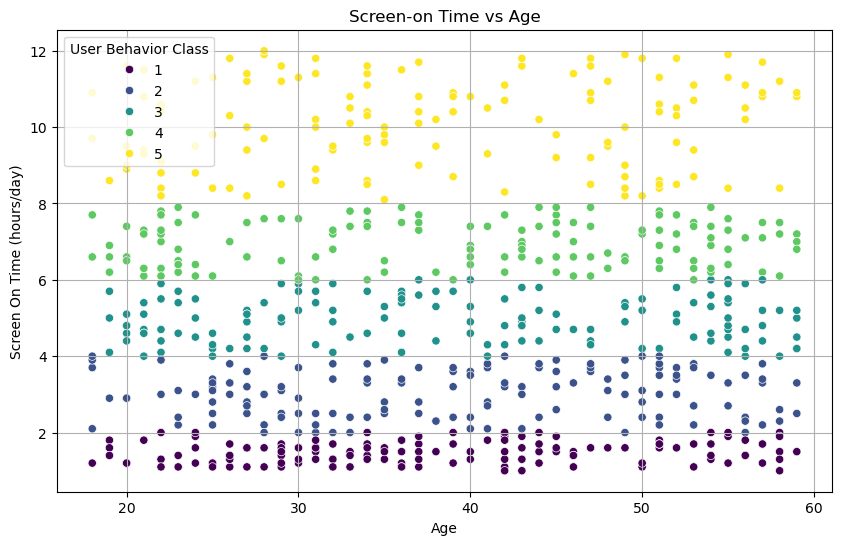

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Screen On Time (hours/day)', hue='User Behavior Class', palette='viridis')
plt.title('Screen-on Time vs Age')
plt.xlabel('Age')
plt.ylabel('Screen On Time (hours/day)')
plt.grid(True)
plt.savefig('../visualizations/screen_on_tim_age.png')
plt.show()



#### Hypothesis Testing

#### Do extreme users (Class 5) have significantly higher screen-on time?



Class 5 vs Other Classes: t-statistic = 32.44157588647851, p-value = 1.72070898702476e-141


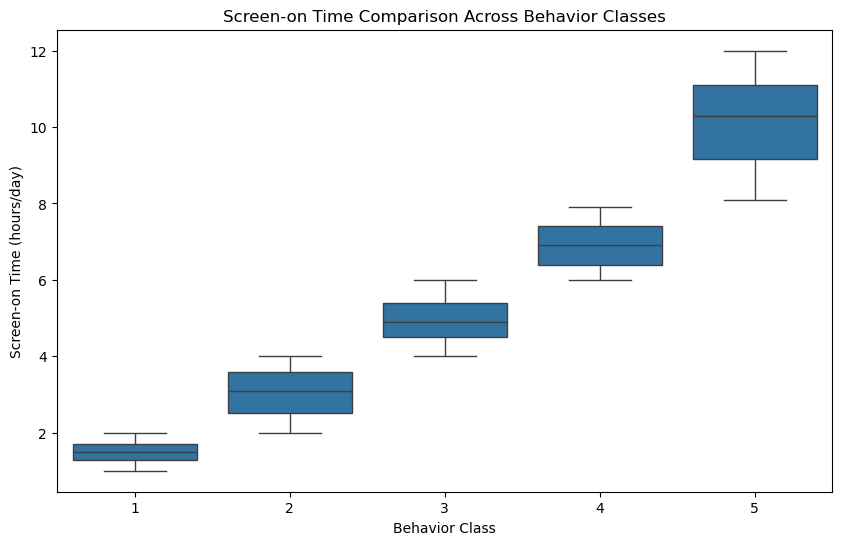

In [14]:


# Filter the data for Class 5 (extreme users)
class_5_data = df[df['User Behavior Class'] == 5]['Screen On Time (hours/day)']
other_classes_data = df[df['User Behavior Class'] != 5]['Screen On Time (hours/day)']

# Perform t-test to compare screen-on time between Class 5 and other classes
from scipy.stats import ttest_ind
t_stat_class_5, p_value_class_5 = ttest_ind(class_5_data, other_classes_data)
print(f"Class 5 vs Other Classes: t-statistic = {t_stat_class_5}, p-value = {p_value_class_5}")
# Visualization: Box plot comparing screen-on time across behavior classes
plt.figure(figsize=(10,6))
sns.boxplot(x='User Behavior Class', y='Screen On Time (hours/day)', data=df)
plt.title('Screen-on Time Comparison Across Behavior Classes')
plt.xlabel('Behavior Class')
plt.ylabel('Screen-on Time (hours/day)')
plt.savefig('../visualizations/screen_on_time_class.png')
plt.show()





The very small p-value (far below 0.05) indicates that there is a statistically significant difference in screen-on time between extreme users (Class 5) and other behavior classes. In other words, Class 5 (extreme users) has significantly higher screen-on time compared to the other classes.

#### Does gender impact screen-on time?


Gender Comparison: t-statistic = nan, p-value = nan


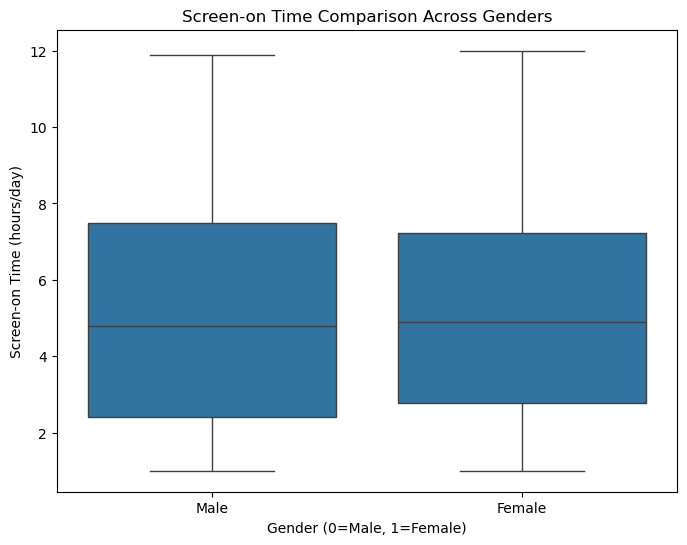

In [15]:
# Hypothesis 2: Does gender impact screen-on time?

# Separate the data by gender
male_data = df[df['Gender'] == 0]['Screen On Time (hours/day)']
female_data = df[df['Gender'] == 1]['Screen On Time (hours/day)']

# Perform t-test to compare screen-on time between genders
t_stat_gender, p_value_gender = ttest_ind(male_data, female_data)

# Results

print(f"Gender Comparison: t-statistic = {t_stat_gender}, p-value = {p_value_gender}")

# Visualization: Box plot comparing screen-on time across behavior classes

# Visualization: Box plot comparing screen-on time across gender
plt.figure(figsize=(8,6))
sns.boxplot(x='Gender', y='Screen On Time (hours/day)', data=df)
plt.title('Screen-on Time Comparison Across Genders')
plt.xlabel('Gender (0=Male, 1=Female)')
plt.ylabel('Screen-on Time (hours/day)')
plt.savefig('../visualizations/screen_on_time_gender.png')
plt.show()

The p-value is very large (greater than 0.05), suggesting that there is no statistically significant difference in screen-on time between males and females. Therefore, gender does not have a significant impact on screen-on time.